In [1]:
import imageio                                          #Se importan las librecias a utilizar
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M_YIQ = np.array([[0.299   , 0.587    ,     0.114],    #Se cargan las matrices de convesion
                  [0.595716, -0.274453, -0.321263],    # RGB a YIQ
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563 ,  0.6210],               # YIQ a RGB
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):                              # Funcion que reacomoda el formato
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):                                      # Funcion que aplica la conversion rga a yiq
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):                                      # Funcion que aplica la conversion yiq a rgb
    return apply_matrix(img, M_RGB)

def plot_hist(im, bins, ax, cumulative=False):         # Funcion que grafica el histograma de una imagen
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

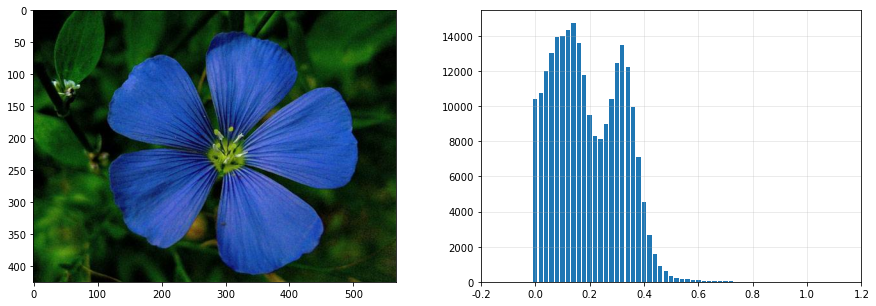

In [3]:
img_rgb = imageio.imread('FlorAzul.png')[:,:,0:3]/255          # Se carga y normaliza entre 0 y 1 una imagen

#img_yiq = (apply_matrix(img_rgb, M_YIQ))
#img_yiq[:,:,0] = img_yiq[:,:,0]*2
#img_rgb = apply_matrix(img_yiq, M_RGB)
 
fig, axes = plt.subplots(1, 2, figsize=(15,5))                 # Configuracion del ploteo
axes[0].imshow(np.clip(img_rgb,0,1))                           # Se muestra la imagene original
plot_hist(img_rgb, 50, axes[1])                                # Se muestra el histograma original

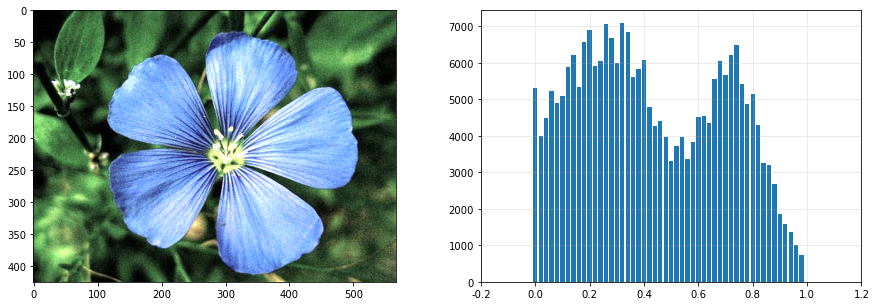

In [5]:
img_gray = rgb2yiq(img_rgb)[:,:,0]    #Se separa la luminancia de la imagen       
inMin = img_gray.min()                #Se definen los valoes maximos y minimos de entrada y salida             
inMaX = 0.45 #img_gray.max()
outMin = 0
outMax = 1

img = np.zeros(img_gray.shape)        #Se crea una matriz del tamaño de la imagen original

img =np.divide(np.multiply((img_gray-inMin), (outMax - outMin)) , (inMaX)) + outMin  #Se aplica la formula normalizadora

img_1 = rgb2yiq(img_rgb)              #Se genera una nueva matriz a partir de la original
img_1[:,:,0] = img                    #Se reemplaza el canal y
img_rgb1 = yiq2rgb(img_1)

fig, axes = plt.subplots(1, 2, figsize=(15,5))  #Se plotenan resultados
axes[0].imshow(np.clip(img_rgb1,0,1))
plot_hist(img_rgb1, 50, axes[1])

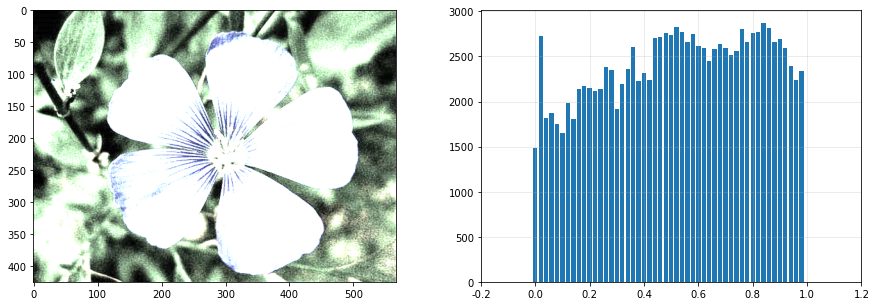

In [67]:
img_gray = rgb2yiq(img_rgb)[:,:,0]
inMin = 0

inMaX = np.percentile(img_gray,50)    #En esta oportunidad se toman los valores de luminancia que
outMin = 0                            # entren en el rango percentil que definamos en esa funcion,
outMax = 1                            # el resto es basicamente la misma funcion previa

img = np.zeros(img_gray.shape)

# Sabiendo el minimo y el máximo, aplicar una funcion 
# que "estire" el historgrama desde 0 a 1.

img =np.divide(np.multiply((img_gray-inMin), (outMax - outMin)) , (inMaX)) + outMin

img_1 = rgb2yiq(img_rgb)
img_1[:,:,0] = img
img_rgb1 = yiq2rgb(img_1)

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(np.clip(img_rgb1,0,1))
plot_hist(img_rgb1, 50, axes[1])


In [29]:
# Definir una función que aplique la corrección gamma a una imagen.
# Normalizar al rango [0, 1] y luego aplicar la correccion gamma.
# y_out = y_in ^ gamma 
def gamma(img_1,gamma):
    img_1_y = rgb2yiq(img_1)[:,:,0]       #Se toman los canales Y de cada imagen
    img_1_y/img_1_y.max()                 #Luego se dividen por el valor maximo para normalizar a 1
    img_2 = rgb2yiq(img_1)    
    img_2[:,:,0] = pow(img_1_y,gamma)     #Por ultimo se elevan al gamma todos los puntos de luminancia
    
    img_2 = yiq2rgb(img_2)
    
    return img_2  

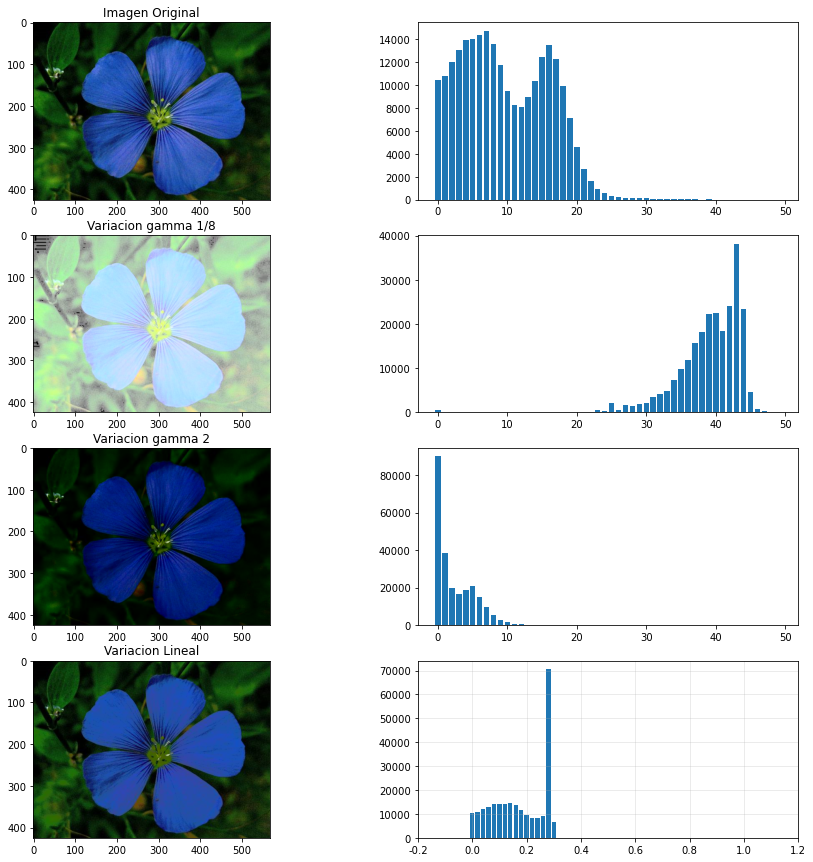

In [82]:
##### img_yiq = rgb2yiq(img_rgb)
img_yiq_y = img_yiq[:,:,0]
img_yiq_i = img_yiq[:,:,1]
img_yiq_q = img_yiq[:,:,2]

#--------------------------------
#Raiz Cuadrada
#img_yiq_y_mod = np.sqrt(img_yiq_y)
#--------------------------------
#Función cuadrática
#img_yiq_y_mod = np.square(img_yiq_y)
#--------------------------------
#Lineal a trozos
#np.interp()
x = np.array([0, 0.3, 0.6,  1]) #[0 ... 1]
y = np.array([0, 0.3, 0.3,  1]) #[0 ... 1]
#plt.plot(x,y)
img_yiq_y_mod = np.interp(img_yiq_y, x, y)

#--------------------------------

img_yiq_mod = np.zeros(img_rgb.shape)
img_yiq_mod[:,:,0] = img_yiq_y_mod
img_yiq_mod[:,:,1] = img_yiq_i
img_yiq_mod[:,:,2] = img_yiq_q


img_rgb_mod = yiq2rgb(img_yiq_mod)

#--------------------------------
#Gamma
img_rgb_mod1 = gamma(img_rgb,1/8)
img_rgb_mod2 = gamma(img_rgb,2)

fig, axes = plt.subplots(4, 2, figsize=(15,15))
axes[0,0].imshow(np.clip(img_rgb,0,1))
axes[0,0].set_title('Imagen Original')
axes[1,0].imshow(np.clip(img_rgb_mod1,0,1))
axes[1,0].set_title('Variacion gamma 1/8')
axes[2,0].imshow(np.clip(img_rgb_mod2,0,1))
axes[2,0].set_title('Variacion gamma 2')
axes[3,0].imshow(np.clip(img_rgb_mod,0,1))
axes[3,0].set_title('Variacion Lineal')
plot_hist(img_rgb, 50, axes[0,1])
plot_hist(img_rgb_mod1, 50, axes[1,1])
plot_hist(img_rgb_mod2, 50, axes[2,1])
plot_hist(img_rgb_mod, 50, axes[3,1])